# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [25]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [26]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

[103, 340, 415]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,56082,3504,8906,18028,1480,2498
1,381,4025,9670,388,7271,1371
2,7842,6046,8552,1691,3540,1874


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
103   98.9  48.2     70.0    99.1              60.0          85.2
340    5.0  55.2     72.3    13.2              89.5          63.9
415   47.5  67.5     68.6    52.7              72.7          76.8


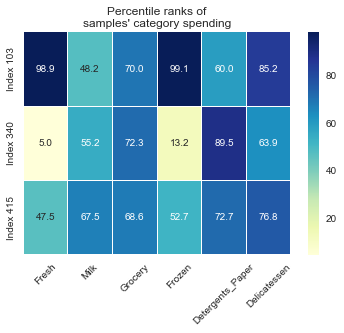

In [27]:
# TODO: Select three indices of your choice you wish to sample from the dataset
from random import randint

S = {};
while len(S) < 3:
    S[randint(1,440)]=1
indices = S.keys()
indices = [103,340,415]
print indices

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# The following is taken from my project's first review
import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

According to https://arxiv.org/pdf/1211.0437.pdf (p. 13), 298 of the data points are from hotels/cafes/restaurants, and the remaining 142 are from retail.

Customer 0 buys a particularly large amount of fresh and frozen food, while comparatively little detergents and paper.  I could imagine customer 0 being a sit-down restaurant, or, say, a produce market.

Customer 1 buys >75 percentile amount of detergents and paper, and near 75 percentile in groceries.  It buys very little in terms of fresh or frozen goods.  Albeit some groceries.  Presumably many of these groceries this consumer buys are nonperishable.  One possibility is that customer 1 is a drug store.  Perhaps it is a hotel that has a cafe.

Customer 2 is >50 percentile in every category except for fresh.  Perhaps customer 2 is a convenience store.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [28]:
from sklearn.cross_validation import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor as DTR
scores = {}

for key in data.keys(): #why not try all features?  There's only 6.
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

    new_data = data.copy()
    new_y = data[key]
    new_data.drop(key,axis=1, inplace=True) #now actually dropping the column in new_data

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = tts(new_data, new_y, test_size=0.25, random_state=1181895)
    
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DTR(random_state=212)
    regressor.fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    scores[key] = score

print '{:<20}'.format("Feature"), 'Score\n', '='*40    
for key in scores.keys():
    print '{: <20}'.format(key), scores[key]

Feature              Score
Grocery              0.595731412617
Frozen               -0.267930102025
Delicatessen         -3.54636461413
Detergents_Paper     0.663756234011
Fresh                -0.779545785448
Milk                 0.12707560983


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I attempted to predict every feature.  The reported scores are printed above.  The features were predicted relatively poorly, with the exception being that Grocery and Detergents_Paper could be predicted reasonably well from the other features.  We will later see that these two features are perhaps the most correlated among all pairs of features.

Based on R^2 score of 0.66375, I believe that 'Detergents_Paper' is not a critically necessary feature for clustering customers, with all other features available.  Essentially it means that the other five features can predict 0.66375 of the variance of the Detergents_Paper feature.  Since the number of features is fairly small, we'll keep all six features anyways.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

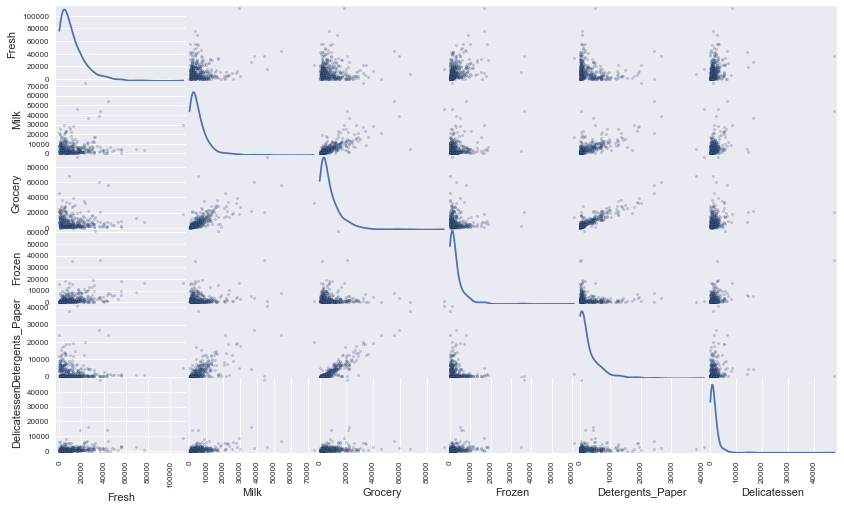

In [29]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**  Judging based on the scatter plots, I would say that 'Grocery' and 'Detergents Paper' appear to be the most correlated amongst features.  It appears ('Milk', 'Detergents Paper'), as well as ('Milk', 'Grocery') also exhibit some correlation.

In particular, this confirms my suspicions from question 2 that Detergents_Paper is not necessary, as it is largely predicted by 'Grocery'.  That is, the Detergents_Paper feature may be largely reconstructed from the Grocery feature.

Each of the features appears somewhat like a normal distribution, with the left side chopped off.  I.e., the features all appear skewed to the right.  A normal distribution, unlike the ones seen above, are symmetric and balanced.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

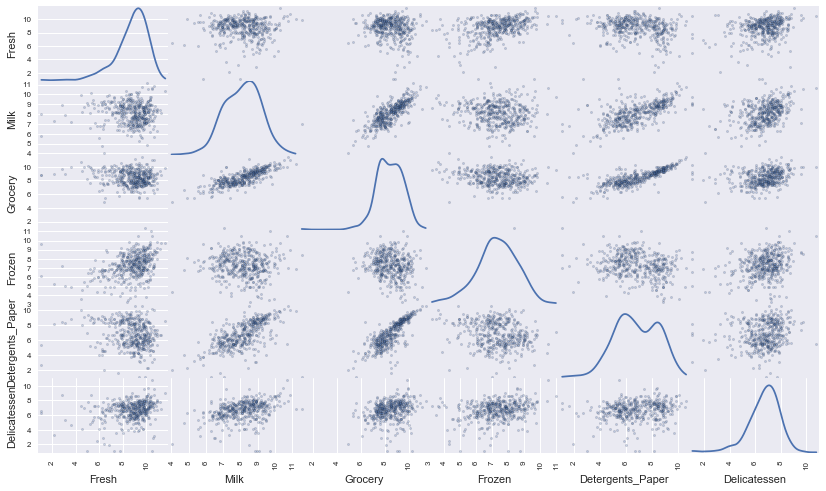

In [30]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

It appears that the 3 pairs of correlated features (Grocery, Detergents Paper), (Grocery, Milk), (Detergents Paper, Milk), are still correlated after the log transformation.  I would say the correlation appears to be stronger than before.

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [31]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.934570,8.161660,9.094480,9.799681,7.299797,7.823246
1,5.942799,8.300280,9.176784,5.961005,8.891649,7.223296
2,8.967249,8.707152,9.053920,7.433075,8.171882,7.535830


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [32]:
# For each feature find the data points with extreme high or low values
outlierCount = {i:0 for i in xrange(len(data))}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

    for i in xrange(len(data)):
        if (log_data[feature][i] < Q1 - step) | (log_data[feature][i] > Q3 + step):
            outlierCount[i] += 1
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [i for i in xrange(len(data)) if outlierCount[i] > 1]
print 'Examples that were outliers in 2 or more features'
for o in outliers:
    print o, outlierCount[o]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Examples that were outliers in 2 or more features
65 2
66 2
75 2
128 2
154 3


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**  The data points 65, 66, 75, 128, and 154 were outliers for more than one feature.  These points seem reasonable to remove because they constitute such a small proportion of the dataset, and it seems likely that they will not help with the clustering of customers.  Moreover, such outliers could significantly affect the variance of features; this will inherently affect the principal component analysis.

I am more interested in the behaviour of the majority of customers.  If the entire dataset has a clustered structure, then the dataset minus 5 outliers will also have this structure.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

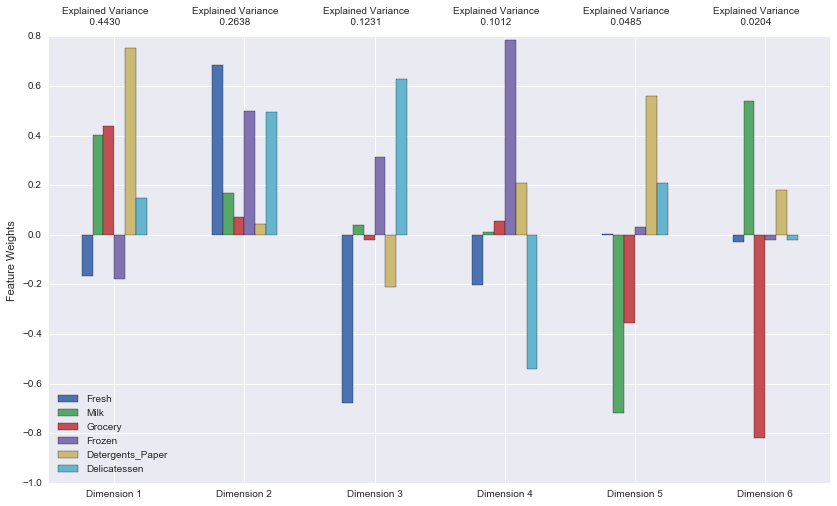

In [33]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**  The total variance explained by the first two components is 0.4430 + 0.2638 = 0.7068.  The first four components explain 1 - 0.0485 - 0.0204 = 0.9311.

The first component appears to be predominantly comprised of Detergents & Paper, followed by Milk and Grocery.  The second component appears to be largely comprised of the other three features.  The third feature is dominated, roughly, by Delicatessen - Fresh, and the fourth feature by Frozen - Delicatessen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [34]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.0326,3.3554,-0.0963,1.0296,0.3539,-0.5474
1,2.7506,-2.1899,1.3656,-0.3003,0.8479,-0.0135
2,1.5972,0.8047,0.1483,-0.0839,0.3191,0.0512


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

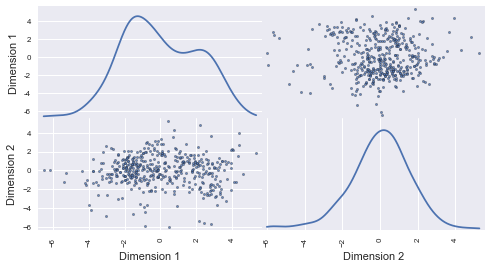

In [35]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Taken from 1st project review
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (8,4), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [36]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.0326,3.3554
1,2.7506,-2.1899
2,1.5972,0.8047


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**  

K-means clustering is computationally cheaper, easy to interpret, and it gives clear boundaries between clusters, determined by the Voroni diagram of the k means.  Gaussian Mixture Model is that it allows for points that maybe aren't clearly in one cluster to be labelled as ambiguously part of multiple clusters.  I'll use GMM because it appears from the plots of the log features that each feature is drawn from one or two normal distributions, and the data set is so small that computation time is not really a factor to consider.

(I'll actually try both clusterers just because I can).

I should further remark that K-means assumes that clusters are spherical, whereas GMM assumes that clusters are elliptical shaped (with axes not necessarily aligned with the axes given by the features).  We can think of GMM as a generalization of K-Means.  Namely, if we restrict GMM to make all prior probabilities equal, and that all covariance matrices are diagonal, then I believe we will have a clustering algorithm functionally equivalent to K-Means.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [37]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = {}
Preds = {}
Centers = {}
Sample_Preds = {}
#print reduced_data
for C in [GMM,KMeans]:
    for k in range(2,10):

        # TODO: Apply your clustering algorithm of choice to the reduced data 
        if C == GMM:
            clusterer = GMM(n_components=k, random_state=167, n_init=5)
        else:
            clusterer = KMeans(n_clusters=k, random_state=167, n_init=5)
        clusterer.fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)
        Preds[C,k] = preds

        # TODO: Find the cluster centers
        if C == GMM:
            centers = clusterer.means_
        else:
            centers = clusterer.cluster_centers_ 
        Centers[C,k] = centers 

        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)
        Sample_Preds[C,k] = sample_preds
        
        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        scores[C,k] = score

    print C
    print '{:>20s}{:>20s}'.format("num clusters", "silhouette score")
    print '='*40
    for k in xrange(2,10):
        print '{:>20d}{:>20f}'.format(k, scores[C,k])

<class 'sklearn.mixture.gmm.GMM'>
        num clusters    silhouette score
                   2            0.411819
                   3            0.391430
                   4            0.336857
                   5            0.278406
                   6            0.269120
                   7            0.321468
                   8            0.306956
                   9            0.314964
<class 'sklearn.cluster.k_means_.KMeans'>
        num clusters    silhouette score
                   2            0.426281
                   3            0.388986
                   4            0.332657
                   5            0.352620
                   6            0.365980
                   7            0.363828
                   8            0.346021
                   9            0.346372


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**  The silhouette scores for 2-9 clusters are given above.  2 clusters gave the best score silhouette score.  K-means actually marginally outperformed the Gaussian mixed model with 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

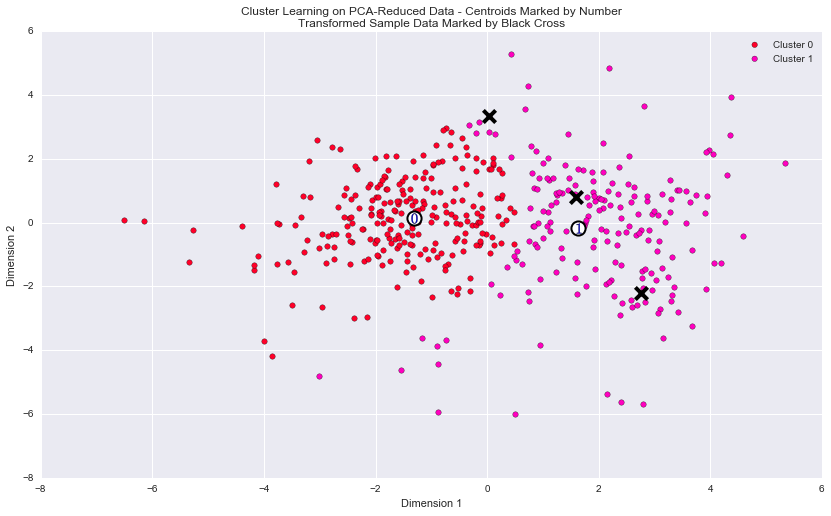

In [38]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, Preds[GMM,2], Centers[GMM,2], pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,56082,3504,8906,18028,1480,2498
1,381,4025,9670,388,7271,1371
2,7842,6046,8552,1691,3540,1874


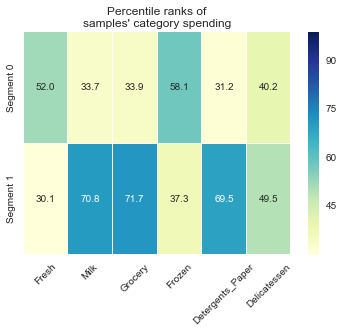

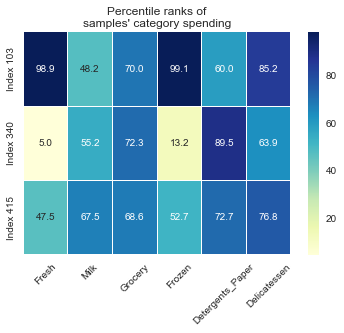

In [39]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(Centers[GMM,2])

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(log_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

idx = [440,441]

data_plus_centers = data.copy()
data_plus_centers = data_plus_centers.append(true_centers, ignore_index = True)

display(samples) #for my reference

# look at percentile ranks of centers
plt.figure()
center_pcts = 100. * data_plus_centers.rank(axis=0, pct=True).iloc[idx].round(decimals=3)
sns.heatmap(center_pcts, yticklabels=['Segment 0', 'Segment 1'], annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

plt.figure()
# visualize percentiles with heatmap
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Segment 0 has roughly:
-roughly 50 percentile Fresh
-slightly above 25 percentile Milk
-slightly above 25 percentile Grocery
-above 50 percentile frozen
-above 25 percentile Detergents_Paper
-between 25 and 50 percentile Delicatessen

Given that most of the features are relatively small, and frozen and fresh are close to 50 percentile.  I envision segment 0 as being largely comprised of convenience stores, drug stores, or any sort of retailer that has a large frozen food section.

Segment 1 has roughly:
-slightly above 25 percentile Fresh
-close to 75 percentile Milk
-close to 75 percentile Grocery
-between 25 and 50 perentile frozen
-close to 75 percentile Detergents_Paper
-roughly 50 percentile Delicatessen

Segment 1 requires a large amount of detergents and paper, as well as groceries and milk, while not much in terms of fresh or frozen.  I envision segment 1 has a lot of hotels, perhaps hotels that run a small restaurant or cafe.



### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [40]:
# Display the predictions
for i, pred in enumerate(Sample_Preds[GMM,2]):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**  All the sample points fit in Cluster 1, although judging by the earlier plot, one of the data points is very close to the boundary of the two clusters.  It seems to me that customer 2 is well represented by segment 1, whereas customers 0 and 1 are not really well represented by either segment.  This seems consistent with the plot above.

A picture is worth a thousand words, so I refer to the two percentile plots appearing before question 8.

-Sample 0, to me, appears closer to Segment 0, but not really close to either segment.  You'll note Sample 0's biggest features are Frozen, then Fresh, then Delicatessen.  This is consistent with Segment 0.  However, the features are significantly larger in Sample 0 than in Segment 0.  You'll notice the clusterer puts Sample Point 0 in Cluster 1.

-Sample 1 looks somewhat similar to Segment 1, in that its two smallest features, 'Fresh' and 'Frozen', correspond to the two smallest features of Segment 1.

-Sample 2 seems similar to Segment 1, in that it has high Milk, Grocery, and Detergents Paper, and low Fresh and Frozen.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**  The wholesaler can note the clustering we computed above, and for each customer segment, keep track of the proportion of customers in that segment who react positively.

As noted by my project reviewer, it is pertinent that, within each segment, the A and B groups are similar, i.e., such that latent or measurable features are not correlated to the feature "is in group A".  I think a reasonable way to do this is by creating the A and B groups via random selection.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**  A supervised learner would determine a clustering of the original customers.  In the case of GMM, this gives us a set of multivariate Gaussians G_1, ..., G_k with weights corresponding to the prior probability of each G_i, i.e., the probability that a sample is chosen from Gaussian G_i.  For each new customer segment we treat their predicted annual purchases as their features, and use it to compute the maximum likelihood Gaussian from which it was drawn.  This can also be done via the GMM.predict() or KMeans.predict() functions, depending on your clusterer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

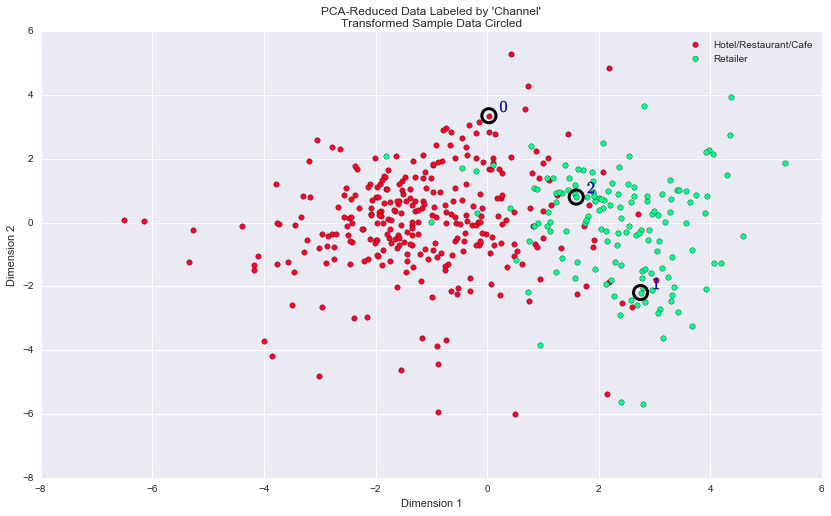

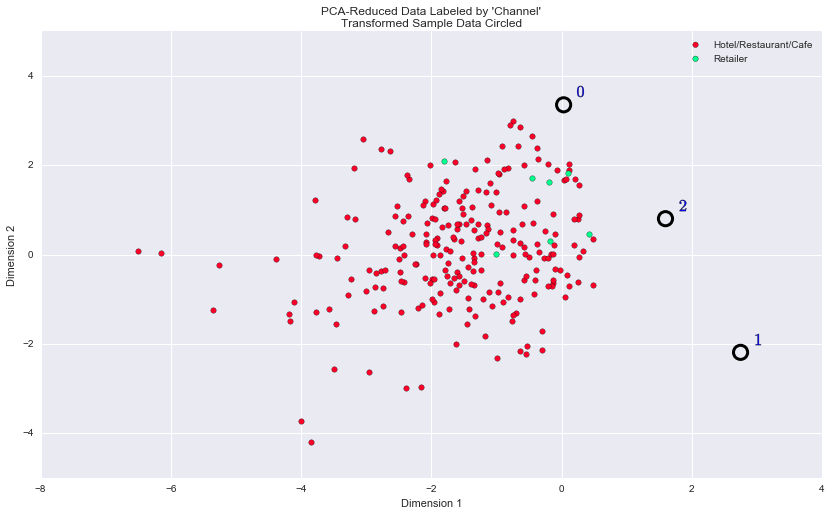

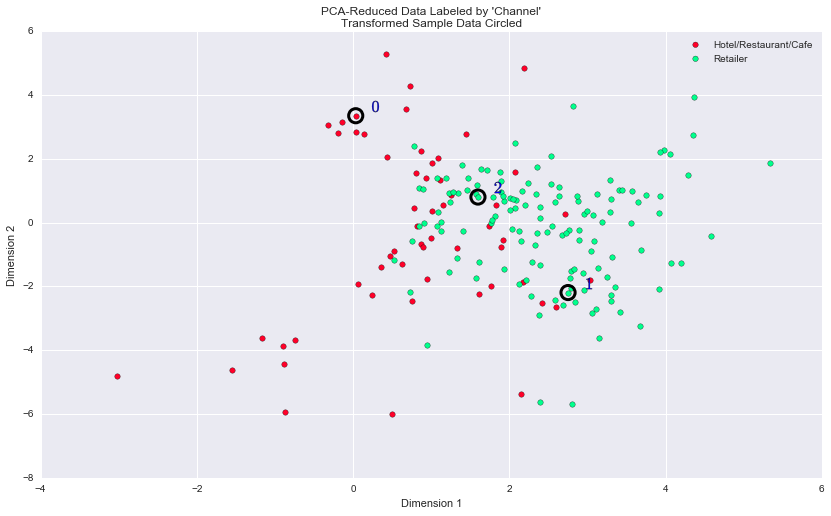

In [41]:
# Display the clustering results based on 'Channel' data
rs = reload(rs) 

rs.channel_results(reduced_data, outliers, pca_samples)
plt.figure()
preds = Preds[GMM,2]
cluster0 = [i for i in xrange(len(preds)) if preds[i]==0]
cluster1 = [i for i in xrange(len(preds)) if preds[i]==1]

#modified channel_results to plot individual clusters
rs.channel_results(reduced_data, outliers, pca_samples, cluster0)
plt.figure()
rs.channel_results(reduced_data, outliers, pca_samples, cluster1)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**  The plots of the Hotel/Restaurant/Cafe vs Retail customers looks fairly similar to the clusters.  I feel more strongly that the clustering is reasonable given the similarity of the plots.  It appears that there are regions of the plot that are purely Hotel/Restaurant/Cafe and parts that are purely Retail.  However, while there appears to be a vertical gap in the plot that makes a reasonable boundary, on either side of the boundary the data points are mixed.

I completely misclassified the segments.  What I thought were hotels was retail, and vice versa.  I make a better programmer than a business analyst.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.